In [ ]:
import numpy as np
import sys
import os
import random 
import pandas as pd
import torch
from torch import nn, cuda, optim
from torchvision import models,transforms,datasets
from torch.utils.data import DataLoader,random_split, dataset
import seaborn as sns
import torch.nn.functional as F
import torch.nn as nn
from math import ceil
import shutil
import time
import copy

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ./dataset1
!mkdir ./dataset2
!unzip /content/drive/MyDrive/DCD_2022/train_cropped_1.zip -d ./dataset1
!unzip /content/drive/MyDrive/DCD_2022/train_cropped_2.zip -d ./dataset1
!unzip /content/drive/MyDrive/DCD_2022/train_cropped_3.zip -d ./dataset1
!unzip /content/drive/MyDrive/DCD_2022/val_cropped.zip -d ./dataset2

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./dataset1/train_cropped/파전/side_부침개류_접시_파전_Q1_00020.JPG  
  inflating: ./dataset1/train_cropped/파전/side_부침개류_접시_파전_Q1_00012.JPG  
  inflating: ./dataset1/train_cropped/파전/side_부침개류_접시_파전_Q1_00014.JPG  
  inflating: ./dataset1/train_cropped/삼계탕/top_건더기국류_뚝배기_삼계탕_Q4_00043.JPG  
  inflating: ./dataset1/train_cropped/파전/side_부침개류_접시_파전_Q1_00010.JPG  
  inflating: ./dataset1/train_cropped/삼계탕/top_건더기국류_뚝배기_삼계탕_Q4_00046.JPG  
  inflating: ./dataset1/train_cropped/삼계탕/top_건더기국류_뚝배기_삼계탕_Q4_00052.JPG  
  inflating: ./dataset1/train_cropped/삼계탕/top_건더기국류_뚝배기_삼계탕_Q4_00042.JPG  
  inflating: ./dataset1/train_cropped/파전/side_부침개류_접시_파전_Q1_00009.JPG  
  inflating: ./dataset1/train_cropped/파전/side_부침개류_접시_파전_Q1_00007.JPG  
  inflating: ./dataset1/train_cropped/파전/side_부침개류_접시_파전_Q1_00013.JPG  
  inflating: ./dataset1/train_cropped/파전/side_부침개류_접시_파전_Q1_00001.JPG  
  inflating: ./dataset1/train_cropped/삼계탕/top_건더기국류_뚝배기_삼계탕_Q4_00026.JPG  
  inflating: 

In [ ]:
# load data #first sampling
train_image_path = '/content/dataset1/train_cropped'
train_classes = []
train_img_per_class = []
train_image_path_lst = sorted(os.listdir(train_image_path))
for folder in train_image_path_lst:
  train_classes.append(folder)
  train_img_per_class.append(len(os.listdir(f'{train_image_path}/{folder}')))
num_classes = len(train_classes)

In [ ]:
val_image_path = '/content/dataset2/val_cropped'
val_classes = []
val_img_per_class = []
val_image_path_lst = sorted(os.listdir(val_image_path))
for folder in val_image_path_lst:
  val_classes.append(folder)
  val_img_per_class.append(len(os.listdir(f'{val_image_path}/{folder}')))
num_classes = len(val_classes)

In [ ]:
# make folder 
!mkdir ./dataset1/quantity
%cd /content/dataset1/quantity
quantity = ['Q1','Q2','Q3', 'Q4', 'Q5']
for i in quantity:
  os.mkdir(i)

/content/dataset1/quantity


FileExistsError: ignored

In [ ]:
!mkdir /content/dataset2/quantity
%cd /content/dataset2/quantity
quantity = ['Q1','Q2','Q3', 'Q4', 'Q5']
for i in quantity:
  os.mkdir(i)

In [ ]:
""" 
k = 0 
for i in range(len(train_classes)):
  path = train_image_path + '/' + train_classes[i]
  food_image = sorted(os.listdir(path))
  list.sort(food_image, key=lambda x: (x[-12:-10]))
  for image in food_image:
    file_source = f'{path}/{image}'
    with open(file_source, 'rb') as img:
      image_metadata = exif.Image(img)
      image_metadata.name = i
      image_metadata.coin_size = new_xy_list[k]
    file_destination =  f'/content/dataset/quantity/{image[-12:-10]}'
    shutil.move(file_source, file_destination)
    k+=1
 """

In [ ]:
#for i in quantity:
  #os.mkdir(i)

for i in range(len(train_classes)):
  path = train_image_path + '/' + train_classes[i]
  food_image = sorted(os.listdir(path))
  list.sort(food_image, key=lambda x: (x[-12:-10]))
  for image in food_image:
    file_source = f'{path}/{image}'
    file_destination =  f'/content/dataset1/quantity/{image[-12:-10]}'
    shutil.move(file_source, file_destination)

In [ ]:
for i in range(len(val_classes)):
  path = val_image_path + '/' + val_classes[i]
  food_image = sorted(os.listdir(path))
  list.sort(food_image, key=lambda x: (x[-12:-10]))
  for image in food_image:
    file_source = f'{path}/{image}'
    file_destination =  f'/content/dataset2/quantity/{image[-12:-10]}'
    shutil.move(file_source, file_destination)

In [ ]:
# checking name
name_list = []
break_list = []
for i in train_classes:
  path = train_image_path + '/' + i
  food_image = sorted(os.listdir(path))
  for image in food_image:
    if image[-14] != i[-1]:
      name_list.append(i)
      break_list.append(image)
      break

In [ ]:
sys.path.append('/content/drive/MyDrive/DCD_2022/음식 이미지 및 영양정보 텍스트')
image_path_t = '/content/dataset1/quantity'
from sort_imagefolder import ImageFolder
train_image = ImageFolder(image_path_t)

In [ ]:
sys.path.append('/content/drive/MyDrive/DCD_2022/음식 이미지 및 영양정보 텍스트')
image_path_v = '/content/dataset2/quantity'
from sort_imagefolder import ImageFolder
val_image = ImageFolder(image_path_v)

In [ ]:
"""
train_size = int(len(train_image_origin) * 0.8)
val_size = len(train_image_origin) - train_size
print(train_size, val_size)
train_image, val_image = random_split(train_image_origin, [train_size, val_size])
"""

In [ ]:
# transform
train_transform = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
val_transform = transforms.Compose([transforms.Resize((224,224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train_image.transform = train_transform
val_image.transform = val_transform

batch_size=16
# dataloader 
train_dl = DataLoader(train_image,batch_size=batch_size,shuffle=True, num_workers= 4)
val_dl = DataLoader(val_image, batch_size=batch_size,shuffle=True, num_workers=4)

In [ ]:
class SEBlock(nn.Module):
    def __init__(self, in_channels, r=16):
        super().__init__()
        self.squeeze = nn.AdaptiveAvgPool2d((1,1))
        self.excitation = nn.Sequential(
            nn.Linear(in_channels, in_channels // r),
            nn.ReLU(),
            nn.Linear(in_channels // r, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.squeeze(x)
        x = x.view(x.size(0), -1) 
        x = self.excitation(x)
        x = x.view(x.size(0), x.size(1), 1, 1)
        return x


In [ ]:
# Depthwise Separable Convolution
class Depthwise(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()

        self.depthwise = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, 3, stride=stride, padding=1, groups=in_channels, bias=False),
            nn.BatchNorm2d(in_channels),
            nn.ReLU6(),
        )

        self.pointwise = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 1, stride=1, padding=0, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU6(),
        )

        self.seblock = SEBlock(out_channels)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        x = self.seblock(x) * x
        return x


# BasicConv2d
class BasicConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, **kwargs):
        super().__init__()

        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, **kwargs),
            nn.BatchNorm2d(out_channels),
            nn.ReLU6()
        )

    def forward(self, x):
        x = self.conv(x)
        return x


# MobileNetV1
class MobileNet(nn.Module):
    def __init__(self, width_multiplier, num_classes=5, init_weights=True):
        super().__init__()
        self.init_weights=init_weights
        alpha = width_multiplier

        self.conv1 = BasicConv2d(3, int(32*alpha), 3, stride=2, padding=1)
        self.conv2 = Depthwise(int(32*alpha), int(64*alpha), stride=1)
        # down sample
        self.conv3 = nn.Sequential(
            Depthwise(int(64*alpha), int(128*alpha), stride=2),
            Depthwise(int(128*alpha), int(128*alpha), stride=1)
        )
        # down sample
        self.conv4 = nn.Sequential(
            Depthwise(int(128*alpha), int(256*alpha), stride=2),
            Depthwise(int(256*alpha), int(256*alpha), stride=1)
        )
        # down sample
        self.conv5 = nn.Sequential(
            Depthwise(int(256*alpha), int(512*alpha), stride=2),
            Depthwise(int(512*alpha), int(512*alpha), stride=1),
            Depthwise(int(512*alpha), int(512*alpha), stride=1),
            Depthwise(int(512*alpha), int(512*alpha), stride=1),
            Depthwise(int(512*alpha), int(512*alpha), stride=1),
            Depthwise(int(512*alpha), int(512*alpha), stride=1),
        )
        # down sample
        self.conv6 = nn.Sequential(
            Depthwise(int(512*alpha), int(1024*alpha), stride=2)
        )
        # down sample
        self.conv7 = nn.Sequential(
            Depthwise(int(1024*alpha), int(1024*alpha), stride=2)
        )

        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.linear = nn.Linear(int(1024*alpha), num_classes)

        # weights initialization
        if self.init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.conv7(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.linear(x)
        return x

    # weights initialization function
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

def mobilenet(alpha=1, num_classes=5):
    return MobileNet(alpha, num_classes)

In [ ]:
model = mobilenet().cuda()
device = torch.device('cuda:0' if cuda.is_available() else 'cpu')
model.to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/vol_weights0.0002_1130_3.pt'))
print(device)

cuda:0


In [ ]:
# define loss function, optimizer, lr_scheduler
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0005)

from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=3)


# get current lr
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']


# calculate the metric per mini-batch
def metric_batch(output, target):
    pred = output.argmax(1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects


# calculate the loss per mini-batch
def loss_batch(loss_func, output, target, opt=None):
    loss_b = loss_func(output, target)
    metric_b = metric_batch(output, target)

    if opt is not None:
        opt.zero_grad()
        loss_b.backward()
        opt.step()
    
    return loss_b.item(), metric_b


# calculate the loss per epochs
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    length = len(dataset_dl)
    i = 1
    start = time.time()
    for xb, yb in dataset_dl:
        if i%300 == 0 or i == length:
          end = time.time()
          print(f"loss_epoch : [{i} / {length}]")
        xb = xb.to(device)
        yb = yb.to(device)
        output = model(xb)

        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b
        i +=1
        if metric_b is not None:
            running_metric += metric_b

        if sanity_check is True:
            break

    loss = running_loss / len_data
    metric = running_metric / len_data
    return loss, metric


# function to start training
def train_val(model, params):
    num_epochs=params['num_epochs']
    loss_func=params['loss_func']
    opt=params['optimizer']
    train_dl=params['train_dl']
    val_dl=params['val_dl']
    sanity_check=params['sanity_check']
    lr_scheduler=params['lr_scheduler']
    path2weights=params['path2weights']

    loss_history = {'train': [], 'val': []}
    metric_history = {'train': [], 'val': []}

    best_loss = float('inf')
    best_model_wts = copy.deepcopy(model.state_dict())
    start_time = time.time()

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr= {}'.format(epoch+1, num_epochs, current_lr))

        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print('Copied best model weights!')

        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print('Loading best model weights!')
            model.load_state_dict(best_model_wts)

        print('train loss: %.6f, train accuracy: %.2f, val loss: %.6f, val accuracy: %.2f, time: %.4f min' %(train_loss, 100*train_metric, val_loss, 100*val_metric, (time.time()-start_time)/60))
        print('-'*10)

    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

In [ ]:
params_train = {
    'num_epochs':20,
    'optimizer':opt,
    'loss_func':loss_func,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'/content/drive/MyDrive/vol_weights0.0002_1130_4.pt',
}

# check the directory to save weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

In [ ]:
model, loss_hist, metric_hist = train_val(model, params_train)
torch.save(model.state_dict(), '/content/drive/MyDrive/SENet_vol_1130_4.pth')

Epoch 1/20, current lr= 0.0001
loss_epoch : [300 / 2263]
loss_epoch : [600 / 2263]
loss_epoch : [900 / 2263]
loss_epoch : [1200 / 2263]
loss_epoch : [1500 / 2263]
loss_epoch : [1800 / 2263]
loss_epoch : [2100 / 2263]
loss_epoch : [2263 / 2263]
loss_epoch : [285 / 285]
Copied best model weights!
train loss: 0.042439, train accuracy: 98.49, val loss: 0.186432, val accuracy: 94.26, time: 11.7854 min
----------
Epoch 2/20, current lr= 0.0001
loss_epoch : [300 / 2263]
loss_epoch : [600 / 2263]
loss_epoch : [900 / 2263]
loss_epoch : [1200 / 2263]
loss_epoch : [1500 / 2263]
loss_epoch : [1800 / 2263]
loss_epoch : [2100 / 2263]
loss_epoch : [2263 / 2263]
loss_epoch : [285 / 285]
Copied best model weights!
train loss: 0.039993, train accuracy: 98.61, val loss: 0.180932, val accuracy: 94.88, time: 23.3750 min
----------
Epoch 3/20, current lr= 0.0001
loss_epoch : [300 / 2263]
loss_epoch : [600 / 2263]
loss_epoch : [900 / 2263]
loss_epoch : [1200 / 2263]
loss_epoch : [1500 / 2263]
loss_epoch : [1

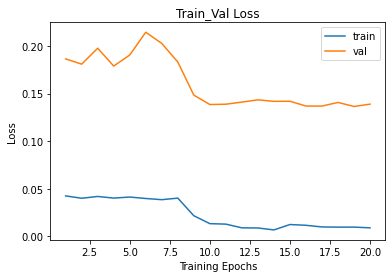

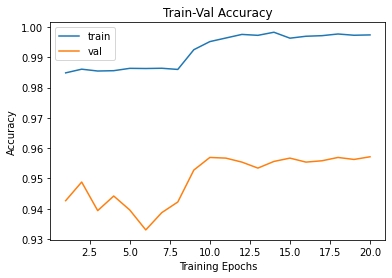

In [ ]:
num_epochs = params_train['num_epochs']

# plot loss progress
plt.title('Train_Val Loss')
plt.plot(range(1, num_epochs+1), loss_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), loss_hist['val'], label='val')
plt.ylabel('Loss')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()

# plot accuracy progress
plt.title('Train-Val Accuracy')
plt.plot(range(1, num_epochs+1), metric_hist['train'], label='train')
plt.plot(range(1, num_epochs+1), metric_hist['val'], label='val')
plt.ylabel('Accuracy')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()